In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
# %matplotlib tk

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from statsmodels.api import Logit

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df_raw = pd.read_csv('유방암.csv', engine="python")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df_raw.describe()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

유방암 데이터를 불러 왔습니다. 결측치는 존재하지 않아 처리하지 않았고 이상치에 대해서도 처리하지 않았습니다.

In [5]:
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y, test_size = 0.428, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))

print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

print("validation data X size : {}".format(df_validation_x.shape))
print("validation data Y size : {}".format(df_validation_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
test data X size : (171, 30)
test data Y size : (171,)
validation data X size : (171, 30)
validation data Y size : (171,)


불러온 데이터를 train : validation : test = 4 : 3 : 3의 비율로 잘랐습니다.

# 서포트 벡터 머신

<H5> C규제에 대한 강도 변경

In [12]:
train_acc = []
test_acc = []
para_c = [10**c for c in range(-2,5)]

for v_C in para_c:
    svm = SVC(C = v_C,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_acc.append(svm.score(df_train_x,df_train_y))
    test_acc.append(svm.score(df_test_x,df_test_y))
    
df_acc_c = pd.DataFrame()
df_acc_c["C"] = para_c
df_acc_c["Train Accuracy"] = train_acc
df_acc_c["Test Accuracy"] = test_acc

df_acc_c.round(3)

,C,Train Accuracy,Test Accuracy
0,0.01,0.630,0.614
1,0.10,0.899,0.860
2,1.00,0.912,0.895
3,10.00,0.930,0.906
4,100.00,0.943,0.924
5,1000.00,0.965,0.953
6,10000.00,0.978,0.947


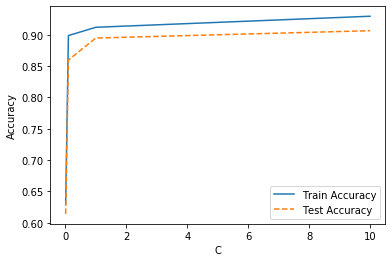

In [8]:
plt.plot(para_c, train_acc, linestyle = "-", label="Train Accuracy")
plt.plot(para_c, test_acc, linestyle = "--", label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

In [20]:
train_acc = []
test_acc = []
para_c = [10*c for c in range(80,100)]

for v_C in para_c:
    svm = SVC(C = v_C,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_acc.append(svm.score(df_train_x,df_train_y))
    test_acc.append(svm.score(df_test_x,df_test_y))
    
df_acc_c = pd.DataFrame()
df_acc_c["C"] = para_c
df_acc_c["Train Accuracy"] = train_acc
df_acc_c["Test Accuracy"] = test_acc

df_acc_c.round(3)

,C,Train Accuracy,Test Accuracy
0,800,0.965,0.947
1,810,0.965,0.947
2,820,0.965,0.953
3,830,0.965,0.953
4,840,0.965,0.953
5,850,0.965,0.953
6,860,0.965,0.953
7,870,0.965,0.953
8,880,0.965,0.953
9,890,0.965,0.953


선택한 cost값은 820입니다.

<h5>gamma 훈련 샘플이 미치는 영향 변경

In [21]:
train_acc = []
test_acc = []
para_gamma = [10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(C = 820,gamma=v_gamma,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_acc.append(svm.score(df_train_x,df_train_y))
    test_acc.append(svm.score(df_test_x,df_test_y))
    
df_acc_gamma = pd.DataFrame()
df_acc_gamma["gamma"] = para_gamma
df_acc_gamma["Train Accuracy"] = train_acc
df_acc_gamma["Test Accuracy"] = test_acc

df_acc_gamma.round(3)

,gamma,Train Accuracy,Test Accuracy
0,0.01,1.0,0.614
1,0.10,1.0,0.614
2,1.00,1.0,0.614
3,10.00,1.0,0.614


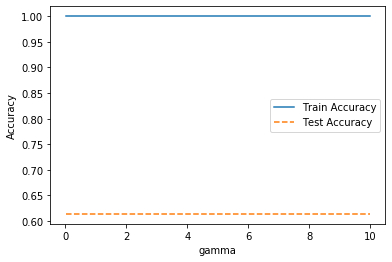

In [19]:
plt.plot(para_gamma, train_acc, linestyle = "-", label="Train Accuracy")
plt.plot(para_gamma, test_acc, linestyle = "--", label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("gamma")
plt.legend()

gamma 변화에 대한 변화율이 보이지 않아 스케일 변환을 하겠습니다.

<h5> 스케일 변환
    
    gamma 값의 변화를 더 잘 보기위해 스케일된 값으로 다시 모델을 만들겠습니다.

In [22]:
v_feature_name = df_train_x.columns
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [24]:
df_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,1.490704e-16,2.544342e-16,-1.338511e-16,-8.429110e-17,2.081912e-16,5.408679e-16,...,-7.988142e-16,-1.834112e-17,-4.015534e-16,-2.848727e-17,-2.189227e-16,-2.579464e-16,1.143393e-16,2.829215e-16,1.670212e-16,2.321908e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


스케일 변환을 통해 위와과 같이 변수들 값의 단위가 비슷하게 변한 것을 알 수 있습니다.

In [33]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)
df_scaled_train_x, df_scaled_validation_x = train_test_split(df_scaled_train_x, test_size = 0.428, random_state = 1234)

print("train data X size : {}".format(df_scaled_train_x.shape))
print("validation data X size : {}".format(df_scaled_validation_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))


train data X size : (227, 30)
validation data X size : (171, 30)
test data X size : (171, 30)


In [34]:
svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_scaled_train_x,df_train_y)
print("Accuracy on training set:{:.3f}".format(svm_scaled.score(df_scaled_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(svm_scaled.score(df_scaled_validation_x,df_validation_y)))
# print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))


Accuracy on training set:0.996
Accuracy on test set:0.977


In [37]:
train_acc = []
test_acc = []
para_c = [10**c for c in range(-2,5)]

for v_C in para_c:
    svm = SVC(C = v_C,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_acc.append(svm.score(df_scaled_train_x,df_train_y))
    test_acc.append(svm.score(df_scaled_validation_x,df_validation_y))
    
df_acc_c = pd.DataFrame()
df_acc_c["C"] = para_c
df_acc_c["Train Accuracy"] = train_acc
df_acc_c["Test Accuracy"] = test_acc

df_acc_c.round(3)

,C,Train Accuracy,Test Accuracy
0,0.01,0.630,0.637
1,0.10,0.974,0.947
2,1.00,0.996,0.977
3,10.00,0.996,0.959
4,100.00,1.000,0.942
5,1000.00,1.000,0.942
6,10000.00,1.000,0.942


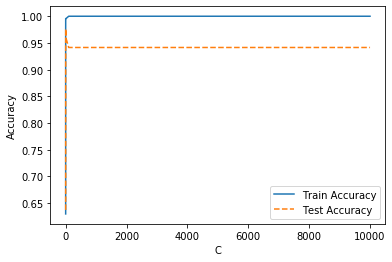

In [38]:
plt.plot(para_c, train_acc, linestyle = "-", label="Train Accuracy")
plt.plot(para_c, test_acc, linestyle = "--", label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

In [48]:
train_acc = []
test_acc = []
para_c = [c*0.1 for c in range(1,21)]

for v_C in para_c:
    svm = SVC(C = v_C,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_acc.append(svm.score(df_scaled_train_x,df_train_y))
    test_acc.append(svm.score(df_scaled_validation_x,df_validation_y))
    
df_acc_c = pd.DataFrame()
df_acc_c["C"] = para_c
df_acc_c["Train Accuracy"] = train_acc
df_acc_c["Test Accuracy"] = test_acc

df_acc_c.round(3)

,C,Train Accuracy,Test Accuracy
0,0.1,0.974,0.947
1,0.2,0.978,0.959
2,0.3,0.982,0.965
3,0.4,0.982,0.971
4,0.5,0.991,0.965
5,0.6,0.991,0.977
6,0.7,0.996,0.977
7,0.8,0.996,0.977
8,0.9,0.996,0.977
9,1.0,0.996,0.977


C의 값은 1을 선택했습니다.

In [59]:
train_acc = []
test_acc = []
para_gamma = [10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(C = 1,gamma=v_gamma,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_acc.append(svm.score(df_scaled_train_x,df_train_y))
    test_acc.append(svm.score(df_scaled_validation_x,df_validation_y))
    
df_acc_gamma = pd.DataFrame()
df_acc_gamma["gamma"] = para_gamma
df_acc_gamma["Train Accuracy"] = train_acc
df_acc_gamma["Test Accuracy"] = test_acc

df_acc_gamma.round(3)

,gamma,Train Accuracy,Test Accuracy
0,0.01,0.987,0.971
1,0.10,0.996,0.947
2,1.00,1.000,0.637
3,10.00,1.000,0.637


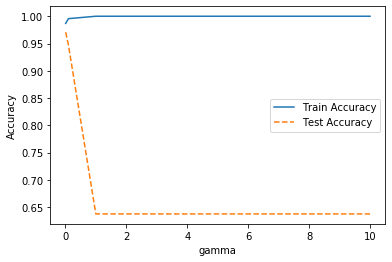

In [60]:
plt.plot(para_gamma, train_acc, linestyle = "-", label="Train Accuracy")
plt.plot(para_gamma, test_acc, linestyle = "--", label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("gamma")
plt.legend()

In [62]:
train_acc = []
test_acc = []
para_gamma = [gamma*0.01 for gamma in range(1,21)]

for v_gamma in para_gamma:
    svm = SVC(C = 1,gamma=v_gamma,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_acc.append(svm.score(df_scaled_train_x,df_train_y))
    test_acc.append(svm.score(df_scaled_validation_x,df_validation_y))
    
df_acc_gamma = pd.DataFrame()
df_acc_gamma["gamma"] = para_gamma
df_acc_gamma["Train Accuracy"] = train_acc
df_acc_gamma["Test Accuracy"] = test_acc

df_acc_gamma.round(3)

,gamma,Train Accuracy,Test Accuracy
0,0.01,0.987,0.971
1,0.02,0.996,0.971
2,0.03,0.996,0.977
3,0.04,0.996,0.965
4,0.05,0.996,0.959
5,0.06,0.996,0.959
6,0.07,0.996,0.959
7,0.08,0.996,0.953
8,0.09,0.996,0.947
9,0.10,0.996,0.947


In [86]:
svc_final = SVC(gamma = 0.02, C = 1, random_state=1234)

svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)
print("Accuracy on training set:{:.3f}".format(svc_final.score(df_scaled_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(svc_final.score(df_scaled_test_x,df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))
svc_final


Accuracy on training set:0.996
Accuracy on test set:0.942
Confusion matrix: 
[[104   1]
 [  9  57]]


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.02, kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

최종으로 완성된 서포트 벡터 머신 모델은 위와 같습니다.

KNN과 인공 신경망 모델을 만들고 나서 세 모델을 비교하겠습니다.

# KNN 분석

이웃의 수 증가에 따른 정확도 변화

In [105]:
train_acc = []
test_acc = []
para_n_neighbors = [i for i in range(1,15)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x,df_train_y)
    train_acc.append(knn.score(df_train_x,df_train_y))
    test_acc.append(knn.score(df_validation_x,df_validation_y))
    
df_acc_neighbors = pd.DataFrame()
df_acc_neighbors["Hidden"] = para_n_neighbors
df_acc_neighbors["Train Accuracy"] = train_acc
df_acc_neighbors["Test Accuracy"] = test_acc

df_acc_neighbors.round(3)

,Hidden,Train Accuracy,Test Accuracy
0,1,1.000,0.901
1,2,0.965,0.906
2,3,0.960,0.918
3,4,0.952,0.924
4,5,0.956,0.918
5,6,0.943,0.918
6,7,0.960,0.918
7,8,0.952,0.924
8,9,0.952,0.924
9,10,0.943,0.918


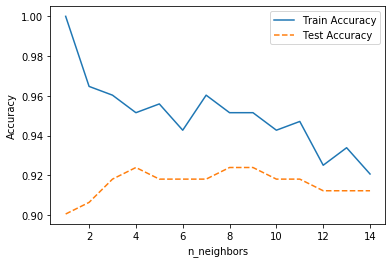

In [106]:
plt.plot(para_n_neighbors, train_acc, linestyle = "-", label="Train Accuracy")
plt.plot(para_n_neighbors, test_acc, linestyle = "--", label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [107]:
train_acc = []
test_acc = []
para_n_neighbors = [i for i in range(1,11)] * 2
para_weights = (["uniform"]) * 10 + (["distance"] * 10)

for (v_n_neighbors,v_weights) in zip(para_n_neighbors,para_weights):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors,weights=v_weights)
    knn.fit(df_train_x,df_train_y)
    train_acc.append(knn.score(df_train_x,df_train_y))
    test_acc.append(knn.score(df_validation_x,df_validation_y))
    
df_acc_weights = pd.DataFrame()
df_acc_weights["Weights"] = para_weights
df_acc_weights["Neighbors"] = para_n_neighbors
df_acc_weights["Train Accuracy"] = train_acc
df_acc_weights["Test Accuracy"] = test_acc

df_acc_weights.round(3)

,Weights,Neighbors,Train Accuracy,Test Accuracy
0,uniform,1,1.000,0.901
1,uniform,2,0.965,0.906
2,uniform,3,0.960,0.918
3,uniform,4,0.952,0.924
4,uniform,5,0.956,0.918
5,uniform,6,0.943,0.918
6,uniform,7,0.960,0.918
7,uniform,8,0.952,0.924
8,uniform,9,0.952,0.924
9,uniform,10,0.943,0.918


In [108]:
df_accuracy_weights_pivot = df_acc_weights.pivot(index = "Neighbors",columns="Weights",values = ["Train Accuracy","Test Accuracy"])
df_accuracy_weights_pivot

Train Accuracy           Test Accuracy          
Weights         distance   uniform      distance   uniform
Neighbors                                                 
1                    1.0  1.000000      0.900585  0.900585
2                    1.0  0.964758      0.900585  0.906433
3                    1.0  0.960352      0.923977  0.918129
4                    1.0  0.951542      0.918129  0.923977
5                    1.0  0.955947      0.912281  0.918129
6                    1.0  0.942731      0.912281  0.918129
7                    1.0  0.960352      0.912281  0.918129
8                    1.0  0.951542      0.918129  0.923977
9                    1.0  0.951542      0.918129  0.923977
10                   1.0  0.942731      0.918129  0.918129

In [109]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)

df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head()

,Train Accuracy_distance,Train Accuracy_uniform,Test Accuracy_distance,Test Accuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.900585,0.900585
2,1.0,0.964758,0.900585,0.906433
3,1.0,0.960352,0.923977,0.918129
4,1.0,0.951542,0.918129,0.923977
5,1.0,0.955947,0.912281,0.918129


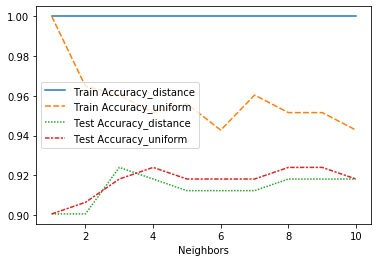

In [111]:
sns.lineplot(data = df_accuracy_weights_pivot)

In [120]:
train_acc = []
test_acc = []
para_n_neighbors = [i for i in range(1,11)] * 3
# para_weights = (["uniform"]) * 10 + (["distance"] * 10)
para_metric = ["minkowski"] * 10 + ["euclidean"] * 10 + ["manhattan"] * 10

for (v_n_neighbors,v_metric) in zip(para_n_neighbors,para_metric):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors,weights="distance",metric=v_metric)
    knn.fit(df_train_x,df_train_y)
    train_acc.append(knn.score(df_train_x,df_train_y))
    test_acc.append(knn.score(df_validation_x,df_validation_y))
    
df_acc_metric = pd.DataFrame()
df_acc_metric["Metric"] = para_metric
df_acc_metric["Neighbors"] = para_n_neighbors
df_acc_metric["Train Accuracy"] = train_acc
df_acc_metric["Test Accuracy"] = test_acc

df_acc_metric.round(3)

,Metric,Neighbors,Train Accuracy,Test Accuracy
0,minkowski,1,1.0,0.901
1,minkowski,2,1.0,0.901
2,minkowski,3,1.0,0.924
3,minkowski,4,1.0,0.918
4,minkowski,5,1.0,0.912
5,minkowski,6,1.0,0.912
6,minkowski,7,1.0,0.912
7,minkowski,8,1.0,0.918
8,minkowski,9,1.0,0.918
9,minkowski,10,1.0,0.918


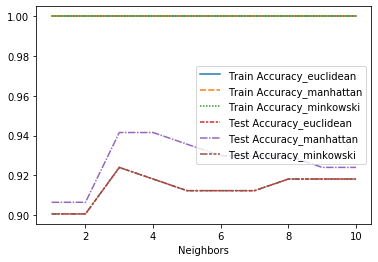

In [123]:
df_accuracy_metric_pivot = df_acc_metric.pivot(index = "Neighbors",columns="Metric",values = ["Train Accuracy","Test Accuracy"])

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)

df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data = df_accuracy_metric_pivot)

In [128]:
knn_final = KNeighborsClassifier(n_neighbors=4,weights = "distance",metric="manhattan")
# knn_final = KNeighborsClassifier(n_neighbors=3,weights = "uniform",metric="manhattan")
knn_final.fit(df_train_x, df_train_y)

y_pred = knn_final.predict(df_test_x)

print("Accuracy on training set:{:.3f}".format(knn_final.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(knn_final.score(df_test_x,df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))

knn_final


Accuracy on training set:1.000
Accuracy on test set:0.959
Confusion matrix: 
[[103   2]
 [  5  61]]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

최종적으로 제작한 knn 모델은 다음과 같습니다

knn_final = KNeighborsClassifier(n_neighbors=4,weights = "distance",metric="manhattan")

정확도는 0.959로 서포트 벡터 머신보다 살짝 높게 나왔습니다.

# 인공 신경망

은닉층 조정

In [145]:
train_acc = []
test_acc = []
para_hidden = [10 * hidden for hidden in range(1,21)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=v_hidden,random_state=1234)
#     nn = MLPClassifier(hidden_layer_sizes=(v_hidden,v_hidden),random_state=1234)
    nn.fit(df_train_x,df_train_y)
    train_acc.append(nn.score(df_train_x,df_train_y))
    test_acc.append(nn.score(df_validation_x,df_validation_y))
    
df_acc_hidden = pd.DataFrame()
df_acc_hidden["Hidden"] = para_hidden
df_acc_hidden["Train Accuracy"] = train_acc
df_acc_hidden["Test Accuracy"] = test_acc

df_acc_hidden.round(3)

/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

,Hidden,Train Accuracy,Test Accuracy
0,10,0.956,0.936
1,20,0.872,0.889
2,30,0.943,0.906
3,40,0.890,0.871
4,50,0.930,0.924
5,60,0.938,0.906
6,70,0.925,0.936
7,80,0.930,0.924
8,90,0.930,0.942
9,100,0.934,0.912


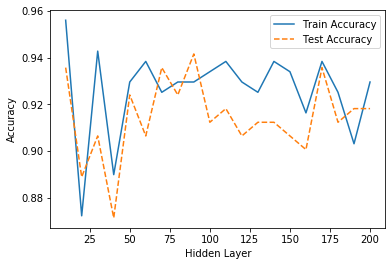

In [146]:
plt.plot(para_hidden, train_acc, linestyle = "-", label="Train Accuracy")
plt.plot(para_hidden, test_acc, linestyle = "--", label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Hidden Layer")
plt.legend()

In [143]:
train_acc = []
test_acc = []
para_hidden = [10 * hidden for hidden in range(1,21)]

for v_hidden in para_hidden:
#     nn = MLPClassifier(hidden_layer_sizes=v_hidden,random_state=1234)
    nn = MLPClassifier(hidden_layer_sizes=(v_hidden,v_hidden),random_state=1234)
    nn.fit(df_train_x,df_train_y)
    train_acc.append(nn.score(df_train_x,df_train_y))
    test_acc.append(nn.score(df_validation_x,df_validation_y))
    
df_acc_hidden = pd.DataFrame()
df_acc_hidden["Hidden"] = para_hidden
df_acc_hidden["Train Accuracy"] = train_acc
df_acc_hidden["Test Accuracy"] = test_acc

df_acc_hidden.round(3)

,Hidden,Train Accuracy,Test Accuracy
0,10,0.850,0.865
1,20,0.925,0.912
2,30,0.938,0.906
3,40,0.934,0.906
4,50,0.925,0.895
5,60,0.921,0.918
6,70,0.824,0.801
7,80,0.899,0.912
8,90,0.916,0.901
9,100,0.824,0.766


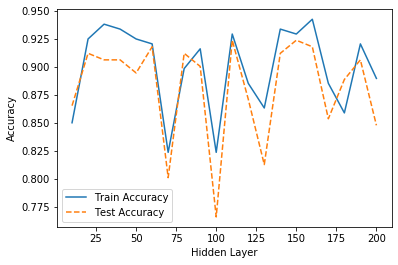

In [144]:
plt.plot(para_hidden, train_acc, linestyle = "-", label="Train Accuracy")
plt.plot(para_hidden, test_acc, linestyle = "--", label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Hidden Layer")
plt.legend()

In [147]:
train_acc = []
test_acc = []
para_hidden = [hidden for hidden in range(1,21)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=v_hidden,random_state=1234)
    nn.fit(df_train_x,df_train_y)
    train_acc.append(nn.score(df_train_x,df_train_y))
    test_acc.append(nn.score(df_validation_x,df_validation_y))
    
df_acc_hidden = pd.DataFrame()
df_acc_hidden["Hidden"] = para_hidden
df_acc_hidden["Train Accuracy"] = train_acc
df_acc_hidden["Test Accuracy"] = test_acc

df_acc_hidden.round(3)

/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

,Hidden,Train Accuracy,Test Accuracy
0,1,0.370,0.363
1,2,0.630,0.637
2,3,0.881,0.889
3,4,0.683,0.725
4,5,0.833,0.877
5,6,0.921,0.918
6,7,0.881,0.877
7,8,0.881,0.906
8,9,0.921,0.912
9,10,0.956,0.936


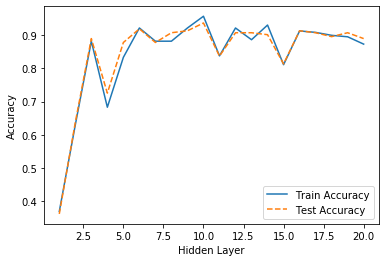

In [148]:
plt.plot(para_hidden, train_acc, linestyle = "-", label="Train Accuracy")
plt.plot(para_hidden, test_acc, linestyle = "--", label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Hidden Layer")
plt.legend()

한개의 히든 레이어를 선택했고 히든 레이어의 노드는 10으로 했습니다.

In [149]:
train_acc = []
test_acc = []
para_function = ["logistic","tanh","relu"]

for v_function in para_function:
    nn = MLPClassifier(hidden_layer_sizes=10,activation=v_function,random_state=1234)
    nn.fit(df_train_x,df_train_y)
    train_acc.append(nn.score(df_train_x,df_train_y))
    test_acc.append(nn.score(df_validation_x,df_validation_y))
    
df_acc_hidden = pd.DataFrame()
df_acc_hidden["ActivationFuncion"] = para_function
df_acc_hidden["Train Accuracy"] = train_acc
df_acc_hidden["Test Accuracy"] = test_acc

df_acc_hidden.round(3)

/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,ActivationFuncion,Train Accuracy,Test Accuracy
0,logistic,0.925,0.918
1,tanh,0.907,0.912
2,relu,0.956,0.936


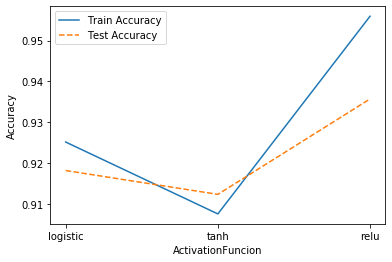

In [150]:
plt.plot(para_function, train_acc, linestyle = "-", label="Train Accuracy")
plt.plot(para_function, test_acc, linestyle = "--", label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("ActivationFuncion")
plt.legend()

<h5> 스케일 변환
    
    성능 향상을 위해 스케일 변화를 해보겠습니다.

In [156]:
train_acc = []
test_acc = []
para_hidden = [10 * hidden for hidden in range(1,21)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=(v_hidden,v_hidden),random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_acc.append(nn.score(df_scaled_train_x,df_train_y))
    test_acc.append(nn.score(df_scaled_validation_x,df_validation_y))
    
df_acc_hidden = pd.DataFrame()
df_acc_hidden["ActivationFuncion"] = para_hidden
df_acc_hidden["Train Accuracy"] = train_acc
df_acc_hidden["Test Accuracy"] = test_acc

df_acc_hidden.round(3)

/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,ActivationFuncion,Train Accuracy,Test Accuracy
0,10,0.996,0.965
1,20,0.996,0.965
2,30,0.996,0.959
3,40,0.996,0.977
4,50,1.000,0.959
5,60,1.000,0.965
6,70,1.000,0.959
7,80,1.000,0.977
8,90,1.000,0.953
9,100,1.000,0.971


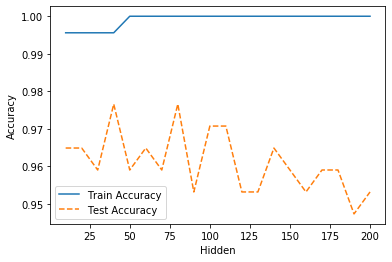

In [157]:
plt.plot(para_hidden, train_acc, linestyle = "-", label="Train Accuracy")
plt.plot(para_hidden, test_acc, linestyle = "--", label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Hidden")
plt.legend()

In [171]:
train_acc = []
test_acc = []
para_hidden = [10 * hidden for hidden in range(1,21)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=v_hidden,random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_acc.append(nn.score(df_scaled_train_x,df_train_y))
    test_acc.append(nn.score(df_scaled_validation_x,df_validation_y))
    
df_acc_hidden = pd.DataFrame()
df_acc_hidden["ActivationFuncion"] = para_hidden
df_acc_hidden["Train Accuracy"] = train_acc
df_acc_hidden["Test Accuracy"] = test_acc

df_acc_hidden.round(3)

/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

,ActivationFuncion,Train Accuracy,Test Accuracy
0,10,0.991,0.965
1,20,0.996,0.982
2,30,0.996,0.965
3,40,0.996,0.971
4,50,0.996,0.965
5,60,0.996,0.971
6,70,0.996,0.971
7,80,0.996,0.971
8,90,0.996,0.971
9,100,0.996,0.959


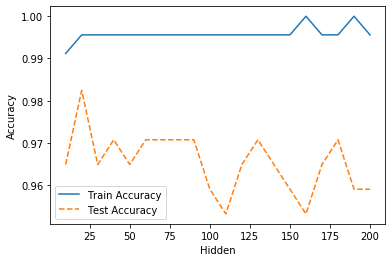

In [172]:
plt.plot(para_hidden, train_acc, linestyle = "-", label="Train Accuracy")
plt.plot(para_hidden, test_acc, linestyle = "--", label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Hidden")
plt.legend()

In [175]:
train_acc = []
test_acc = []
para_hidden = [hidden for hidden in range(10,30)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=v_hidden,random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_acc.append(nn.score(df_scaled_train_x,df_train_y))
    test_acc.append(nn.score(df_scaled_validation_x,df_validation_y))
    
df_acc_hidden = pd.DataFrame()
df_acc_hidden["ActivationFuncion"] = para_hidden
df_acc_hidden["Train Accuracy"] = train_acc
df_acc_hidden["Test Accuracy"] = test_acc

df_acc_hidden.round(3)

/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

,ActivationFuncion,Train Accuracy,Test Accuracy
0,10,0.991,0.965
1,11,0.991,0.959
2,12,0.996,0.971
3,13,0.996,0.977
4,14,0.996,0.965
5,15,0.996,0.971
6,16,0.996,0.982
7,17,0.996,0.982
8,18,0.996,0.965
9,19,0.996,0.977


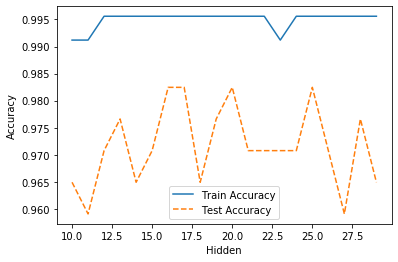

In [176]:
plt.plot(para_hidden, train_acc, linestyle = "-", label="Train Accuracy")
plt.plot(para_hidden, test_acc, linestyle = "--", label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Hidden")
plt.legend()

여러번의 시각화를 통해 하나의 히든레이어를 만들고 히든 레이어의 노드 수는 20으로 정하기로 했습니다.

In [179]:
train_acc = []
test_acc = []
para_function = ["logistic","tanh","relu"]

for v_function in para_function:
    nn = MLPClassifier(activation=v_function,hidden_layer_sizes=20,random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_acc.append(nn.score(df_scaled_train_x,df_train_y))
    test_acc.append(nn.score(df_scaled_validation_x,df_validation_y))
    
df_acc_function = pd.DataFrame()
df_acc_function["ActivationFuncion"] = para_function
df_acc_function["Train Accuracy"] = train_acc
df_acc_function["Test Accuracy"] = test_acc

df_acc_function.round(3)

/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,ActivationFuncion,Train Accuracy,Test Accuracy
0,logistic,0.996,0.977
1,tanh,0.996,0.971
2,relu,0.996,0.982


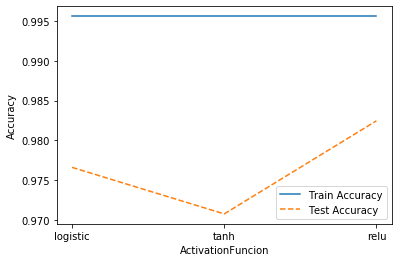

In [180]:
plt.plot(para_function, train_acc, linestyle = "-", label="Train Accuracy")
plt.plot(para_function, test_acc, linestyle = "--", label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("ActivationFuncion")
plt.legend()

In [181]:
train_acc = []
test_acc = []
para_solver= ["lbfgs","sgd","adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver=v_solver,activation="relu",hidden_layer_sizes=20,random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_acc.append(nn.score(df_scaled_train_x,df_train_y))
    test_acc.append(nn.score(df_scaled_validation_x,df_validation_y))
    
df_acc_solver = pd.DataFrame()
df_acc_solver["ActivationFuncion"] = para_solver
df_acc_solver["Train Accuracy"] = train_acc
df_acc_solver["Test Accuracy"] = test_acc

df_acc_solver.round(3)

/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,ActivationFuncion,Train Accuracy,Test Accuracy
0,lbfgs,1.000,0.971
1,sgd,0.969,0.942
2,adam,0.996,0.982


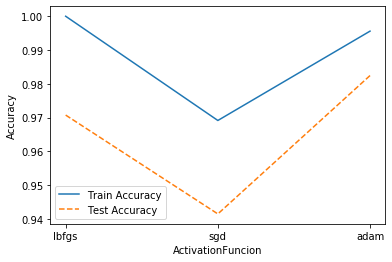

In [182]:
plt.plot(para_solver, train_acc, linestyle = "-", label="Train Accuracy")
plt.plot(para_solver, test_acc, linestyle = "--", label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("ActivationFuncion")
plt.legend()

In [186]:
train_acc = []
test_acc = []
para_batch= [batch*100 for batch in range(1,10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size=v_batch,solver="adam",activation="relu",hidden_layer_sizes=20,random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_acc.append(nn.score(df_scaled_train_x,df_train_y))
    test_acc.append(nn.score(df_scaled_validation_x,df_validation_y))
    
df_acc_solver = pd.DataFrame()
df_acc_solver["Mini Batch"] = para_batch
df_acc_solver["Train Accuracy"] = train_acc
df_acc_solver["Test Accuracy"] = test_acc

df_acc_solver.round(3)

/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:352: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2

,Mini Batch,Train Accuracy,Test Accuracy
0,100,0.996,0.977
1,200,0.996,0.982
2,300,0.982,0.959
3,400,0.982,0.959
4,500,0.982,0.959
5,600,0.982,0.959
6,700,0.982,0.959
7,800,0.982,0.959
8,900,0.982,0.959


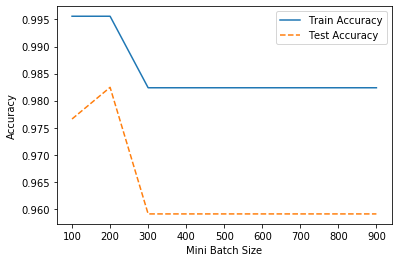

In [187]:
plt.plot(para_batch, train_acc, linestyle = "-", label="Train Accuracy")
plt.plot(para_batch, test_acc, linestyle = "--", label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Mini Batch Size")
plt.legend()

In [188]:
train_acc = []
test_acc = []
para_batch= [batch*10 for batch in range(10,30)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size=v_batch,solver="adam",activation="relu",hidden_layer_sizes=20,random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_acc.append(nn.score(df_scaled_train_x,df_train_y))
    test_acc.append(nn.score(df_scaled_validation_x,df_validation_y))
    
df_acc_solver = pd.DataFrame()
df_acc_solver["Mini Batch"] = para_batch
df_acc_solver["Train Accuracy"] = train_acc
df_acc_solver["Test Accuracy"] = test_acc

df_acc_solver.round(3)

/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

,Mini Batch,Train Accuracy,Test Accuracy
0,100,0.996,0.977
1,110,0.996,0.982
2,120,0.996,0.977
3,130,0.996,0.977
4,140,0.996,0.977
5,150,0.996,0.977
6,160,0.996,0.977
7,170,0.996,0.977
8,180,0.996,0.982
9,190,0.996,0.982


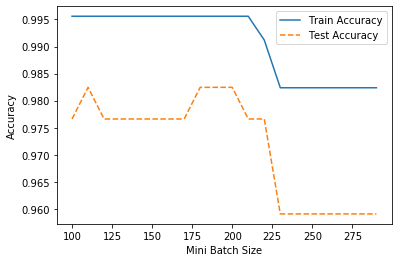

In [189]:
plt.plot(para_batch, train_acc, linestyle = "-", label="Train Accuracy")
plt.plot(para_batch, test_acc, linestyle = "--", label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Mini Batch Size")
plt.legend()

In [190]:
train_acc = []
test_acc = []
para_batch= [batch for batch in range(170,200)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size=v_batch,solver="adam",activation="relu",hidden_layer_sizes=20,random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_acc.append(nn.score(df_scaled_train_x,df_train_y))
    test_acc.append(nn.score(df_scaled_validation_x,df_validation_y))
    
df_acc_solver = pd.DataFrame()
df_acc_solver["Mini Batch"] = para_batch
df_acc_solver["Train Accuracy"] = train_acc
df_acc_solver["Test Accuracy"] = test_acc

df_acc_solver.round(3)

/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

,Mini Batch,Train Accuracy,Test Accuracy
0,170,0.996,0.977
1,171,0.996,0.977
2,172,0.996,0.977
3,173,0.996,0.977
4,174,0.996,0.977
5,175,0.996,0.982
6,176,0.996,0.977
7,177,0.996,0.977
8,178,0.996,0.982
9,179,0.996,0.982


In [192]:
nn_final = MLPClassifier(batch_size=175,solver="adam",activation="relu",hidden_layer_sizes=20,random_state=1234)

nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)
print("Accuracy on training set:{:.3f}".format(nn_final.score(df_scaled_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(nn_final.score(df_scaled_test_x,df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))

nn_final


Accuracy on training set:0.996
Accuracy on test set:0.953
Confusion matrix: 
[[104   1]
 [  7  59]]


/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size=175, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=20, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1234, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

위와 같은 결과를 인공 신경망 모델을 통해 도출했습니다. 이제 각 모델의 결과를 비교해보겠습니다.

서포트 벡터 머신



Accuracy on training set:0.996

Accuracy on test set:0.942

Confusion matrix: 

[[104   1]

 [  9  57]]
 
 

knn



Accuracy on training set:1.000

Accuracy on test set:0.959

Confusion matrix: 

[[103   2]

 [  5  61]]
 
 
 
 인공 신경망
 
 
 
 Accuracy on training set:0.996
 
Accuracy on test set:0.953

Confusion matrix: 

[[104   1]

 [  7  59]]
 


KNN모델의 테스트 정확도가 가장 높습니다. 그러나 confusion maxrix의 (1,2)값이 2입니다.

이는 데이터에서 유방암 환자에게 유방암을 진단하지 않고 정상 진단이라고 판단한 갯수가 2개 라는 뜻입니다.

그래서 제가 이 모델을 가지고 유방암 환자를 진단해야 한다면 그 다음으로 정확도가 높고 유방암 환자 오진율이 낮은 인공 신경망 모델을 선택할 것입니다.